In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Load the dataset
data = pd.read_csv('/kaggle/input/world-all-university-ranking-factors/world all university rank and rank score.csv')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        910 non-null    int64  
 1   ranking-institution-title   910 non-null    object 
 2   location                    898 non-null    object 
 3   Overall scores              910 non-null    object 
 4   Research Quality Score      910 non-null    float64
 5   Industry Score              910 non-null    float64
 6   International Outlook       910 non-null    float64
 7   Research Environment Score  910 non-null    float64
 8   Teaching Score              910 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 64.1+ KB


In [3]:
data.describe()

,rank,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,454.591209,61.655495,52.941429,57.753626,24.548022,25.253846
std,262.697117,18.907380,23.577805,21.926835,17.101846,15.439527
min,1.000000,13.300000,2.200000,18.400000,6.600000,6.700000
25%,227.250000,47.450000,33.125000,39.600000,13.000000,15.800000
50%,454.500000,64.300000,54.850000,54.650000,19.200000,20.200000
75%,681.750000,77.000000,68.500000,76.175000,28.900000,28.975000
max,909.000000,98.600000,100.000000,99.000000,97.400000,98.200000


In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


rank                           0
ranking-institution-title      0
location                      12
Overall scores                 0
Research Quality Score         0
Industry Score                 0
International Outlook          0
Research Environment Score     0
Teaching Score                 0
dtype: int64


**Can you visualize the distribution of the 'Overall scores' column?**

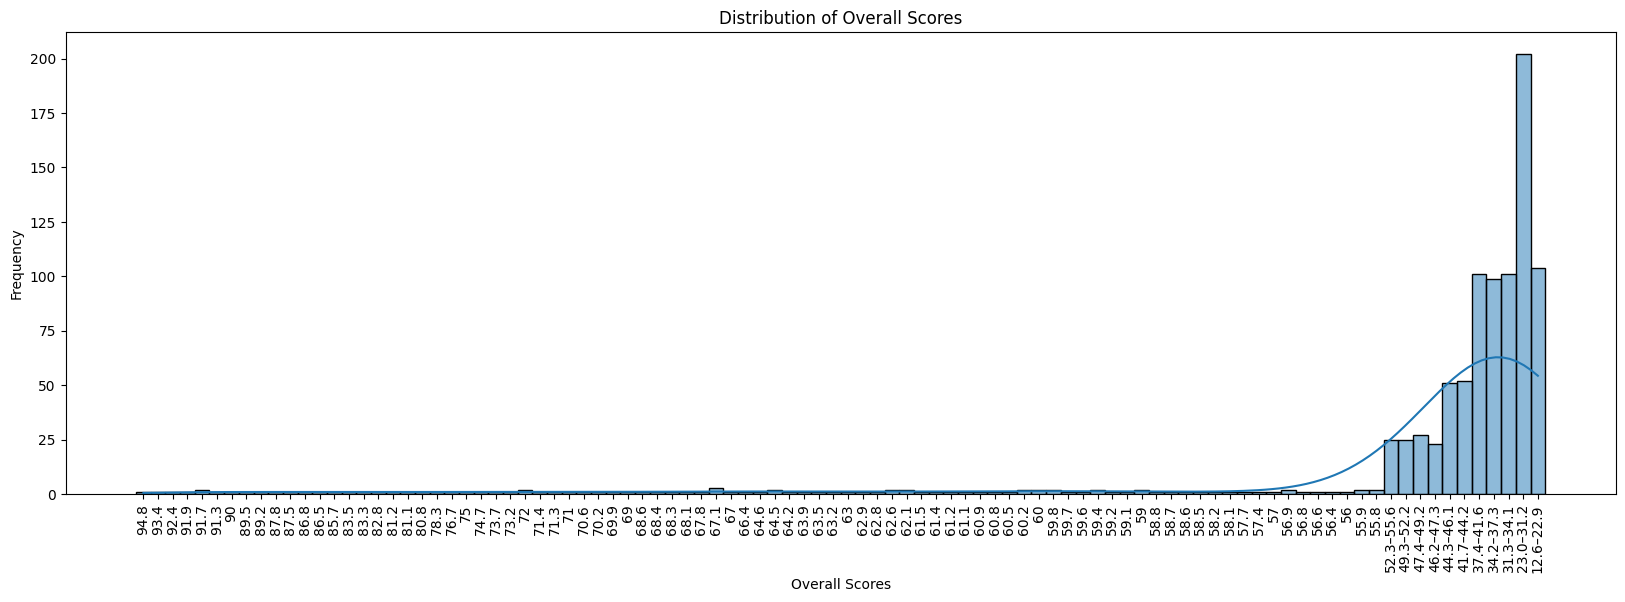

In [5]:
# Visualize the distribution of 'Overall scores' using a histogram
plt.figure(figsize=(20, 6))
sns.histplot(data['Overall scores'], kde=True)
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Scores')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


**Explore the relationship between 'Teaching Score' and 'Research Quality Score'.**

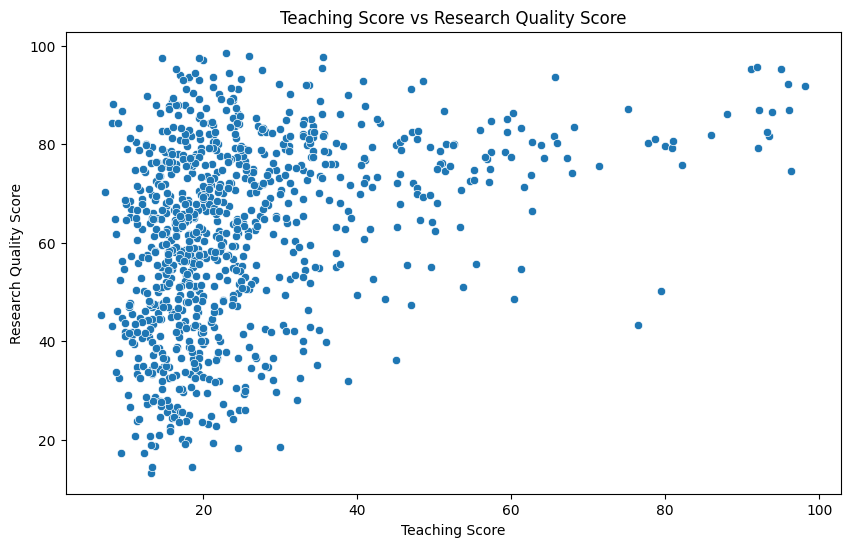

In [6]:
# Scatter plot to visualize the relationship between 'Teaching Score' and 'Research Quality Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Teaching Score', y='Research Quality Score', data=data)
plt.title('Teaching Score vs Research Quality Score')
plt.xlabel('Teaching Score')
plt.ylabel('Research Quality Score')
plt.show()


**What is the average 'Overall scores' for the top-ranked universities?**

In [7]:
# Calculate and visualize the average 'Overall scores' for the top-ranked universities
top_ranked = 20  # You can adjust this value based on your definition of top-ranked

# Convert 'Overall scores' to numeric
data['Overall scores'] = pd.to_numeric(data['Overall scores'], errors='coerce')

# Drop rows with NaN values in 'Overall scores'
data = data.dropna(subset=['Overall scores'])

# Calculate the average
average_scores_top = data.head(top_ranked)['Overall scores'].mean()

print(f"Average Overall Scores for Top {top_ranked} Universities: {average_scores_top:.2f}")


Average Overall Scores for Top 20 Universities: 88.10


**Visualize the distribution of 'International Outlook' scores using a violin plot.**

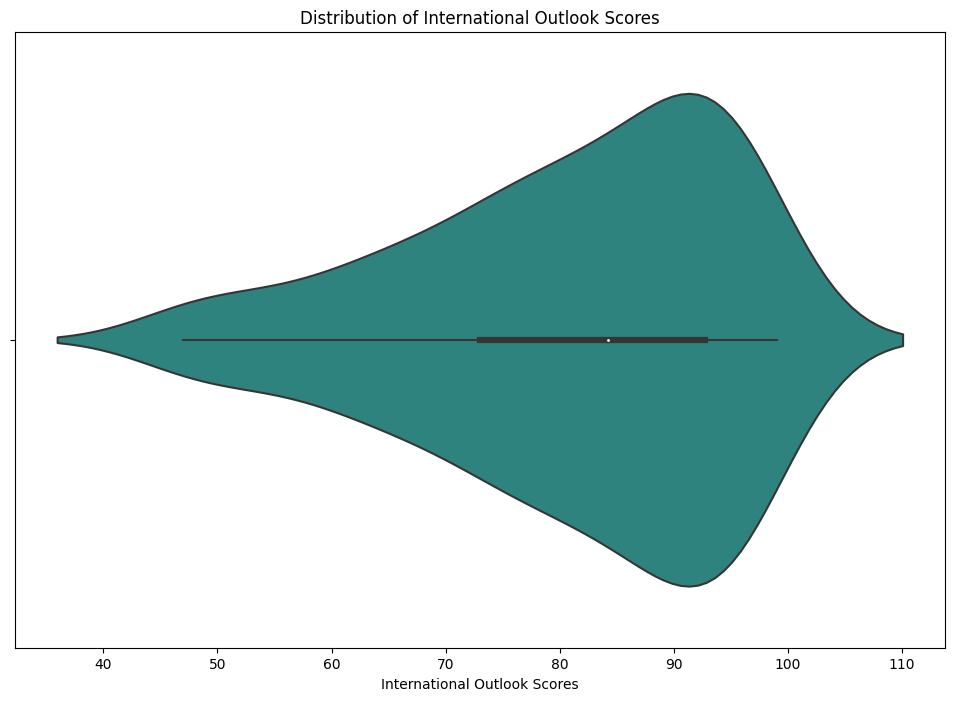

In [8]:
# Violin plot to visualize the distribution of 'International Outlook' scores
plt.figure(figsize=(12, 8))
sns.violinplot(x='International Outlook', data=data, palette='viridis')
plt.title('Distribution of International Outlook Scores')
plt.xlabel('International Outlook Scores')
plt.show()


**Create an interactive scatter plot using Plotly to explore 'Research Environment Score' and 'Teaching Score'.**

In [9]:
# Interactive scatter plot using Plotly
scatter_plot = px.scatter(data, x='Research Environment Score', y='Teaching Score',
                          color='Overall scores', size='Overall scores',
                          hover_name='ranking-institution-title', title='Research Environment vs Teaching Score')
scatter_plot.show()


**Analyze the distribution of 'Research Quality Score' and 'Teaching Score' for the top 50 universities.**

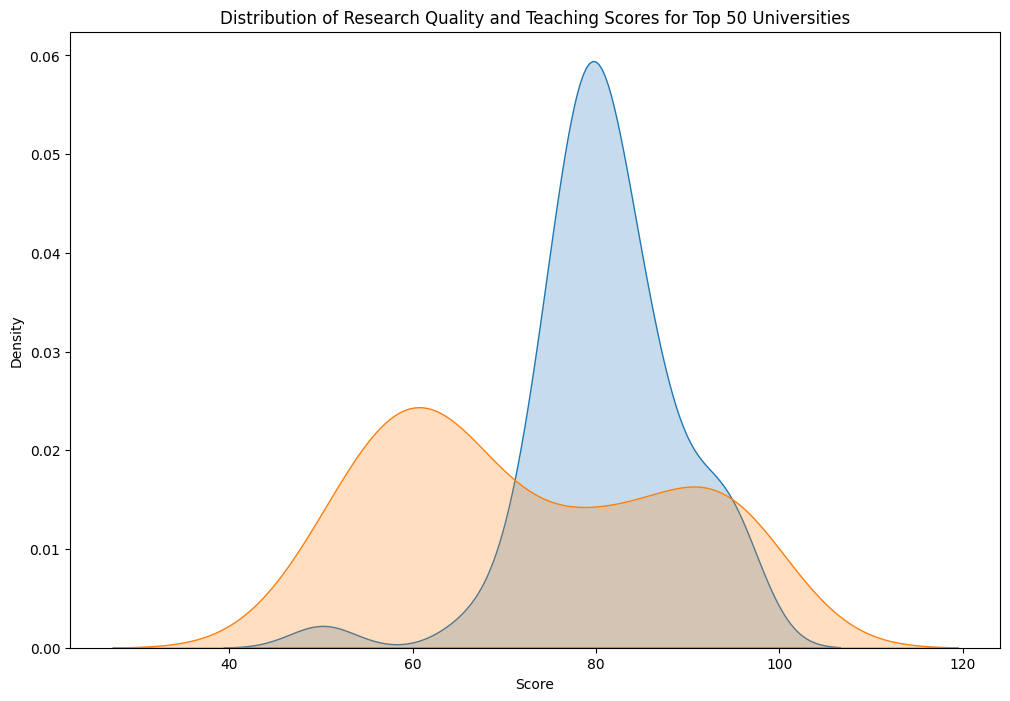

In [10]:
# Select the top 50 universities and visualize the distribution of 'Research Quality Score' and 'Teaching Score'
top_50_universities = data.head(50)
plt.figure(figsize=(12, 8))

sns.kdeplot(data=top_50_universities, x='Research Quality Score', label='Research Quality Score', fill=True)
sns.kdeplot(data=top_50_universities, x='Teaching Score', label='Teaching Score', fill=True)

plt.title('Distribution of Research Quality and Teaching Scores for Top 50 Universities')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()


**Explore the distribution of 'Industry Score' and 'Research Quality Score' using a parallel coordinates plot**

In [11]:
# Parallel coordinates plot using Plotly Express to explore 'Industry Score' and 'Research Quality Score'
parallel_plot = px.parallel_coordinates(data, dimensions=['Industry Score', 'Research Quality Score', 'Teaching Score'],
                                        color='Overall scores', labels={'Overall scores': 'Overall Scores'},
                                        color_continuous_scale=px.colors.sequential.Viridis)
parallel_plot.show()


**Analyze the distribution of 'Teaching Score' and 'Research Quality Score' across different ranks.**

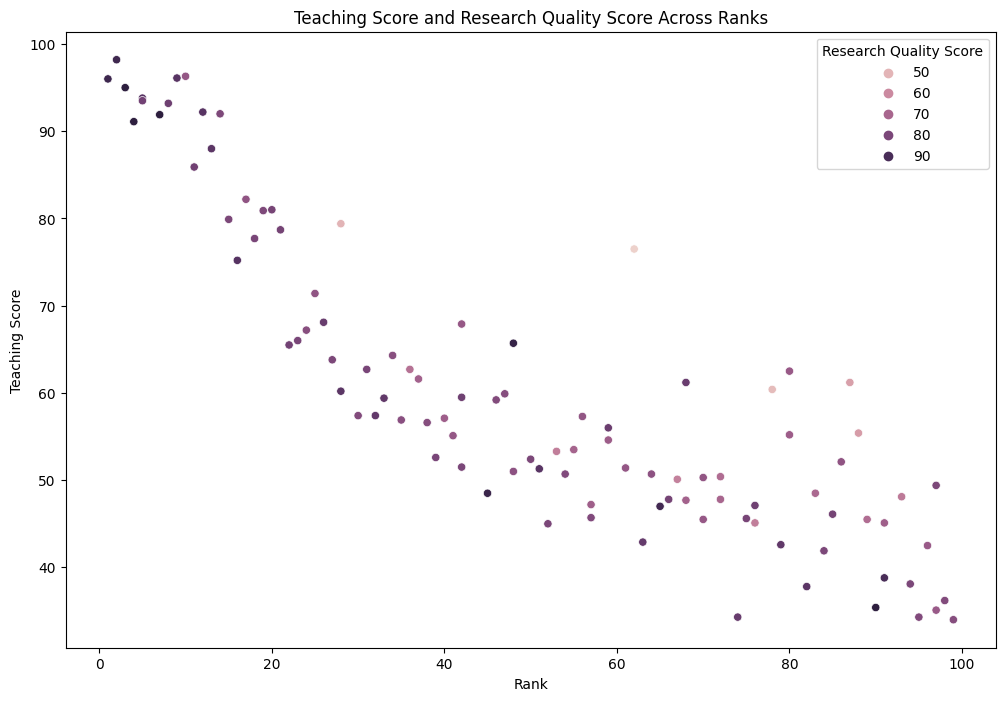

In [12]:
# Scatter plot to visualize the distribution of 'Teaching Score' and 'Research Quality Score' across ranks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rank', y='Teaching Score', hue='Research Quality Score', data=data)
plt.title('Teaching Score and Research Quality Score Across Ranks')
plt.xlabel('Rank')
plt.ylabel('Teaching Score')
plt.show()


**Explore the top 10 universities with the highest 'International Outlook' scores.**

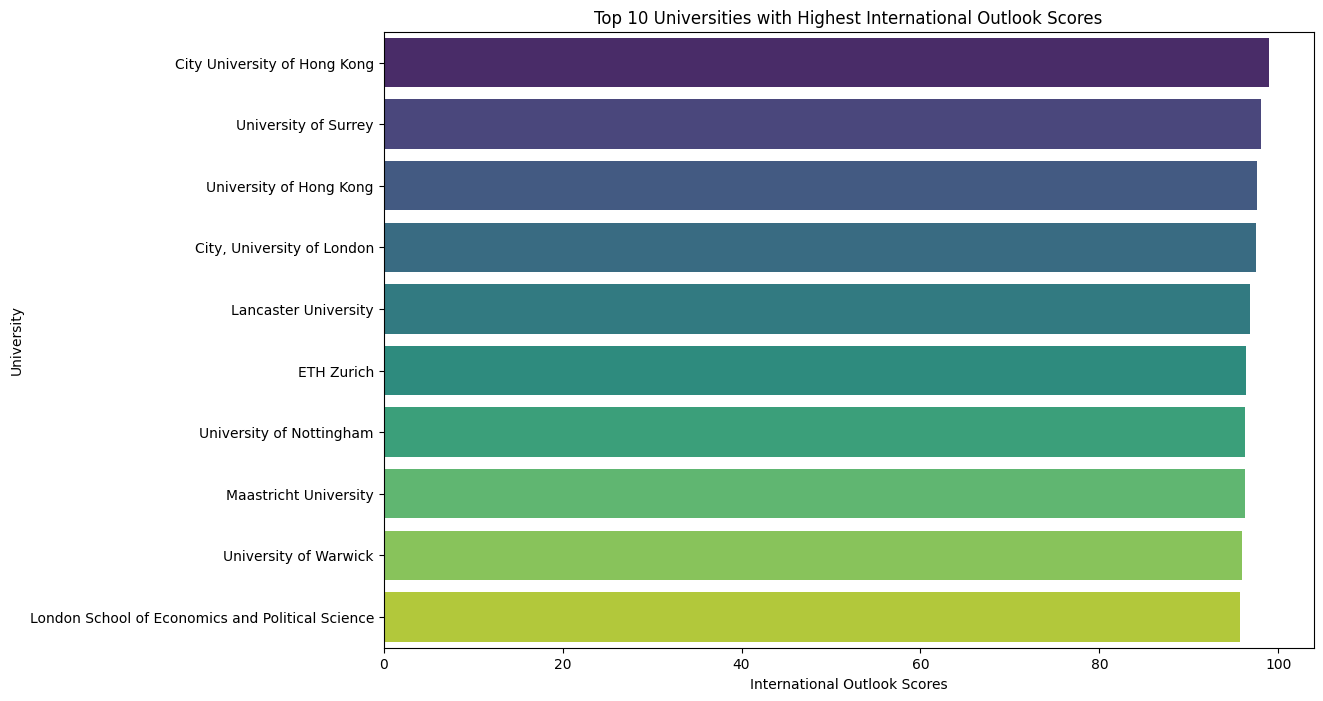

In [13]:
# Select the top 10 universities with the highest 'International Outlook' scores
top_10_international_outlook = data.nlargest(10, 'International Outlook')

# Bar plot to visualize the 'International Outlook' scores for the top 10 universities
plt.figure(figsize=(12, 8))
sns.barplot(x='International Outlook', y='ranking-institution-title', data=top_10_international_outlook, palette='viridis')
plt.title('Top 10 Universities with Highest International Outlook Scores')
plt.xlabel('International Outlook Scores')
plt.ylabel('University')
plt.show()


**Investigate the relationship between 'Research Quality Score' and 'Industry Score' using a joint plot**

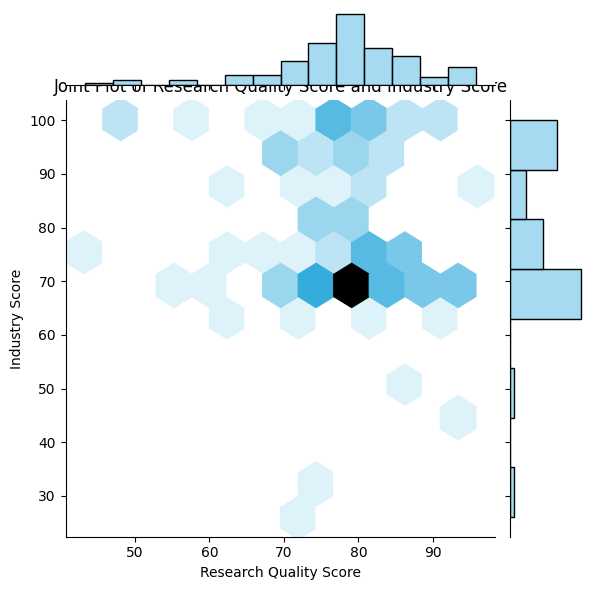

In [14]:
# Joint plot to investigate the relationship between 'Research Quality Score' and 'Industry Score'
sns.jointplot(x='Research Quality Score', y='Industry Score', data=data, kind='hex', color='skyblue')
plt.title('Joint Plot of Research Quality Score and Industry Score')
plt.show()


**Visualize the distribution of 'Overall scores' using a kernel density estimate plot**

In [15]:
# Kernel density estimate plot using Altair to visualize the distribution of 'Overall scores'
alt.Chart(data).mark_area().encode(
    alt.X('Overall scores', bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=None),
).properties(
    title='Kernel Density Estimate of Overall Scores',
    width=500
)


alt.Chart(...)

**Analyze the distribution of 'Teaching Score' and 'Research Environment Score' using a pair plot**

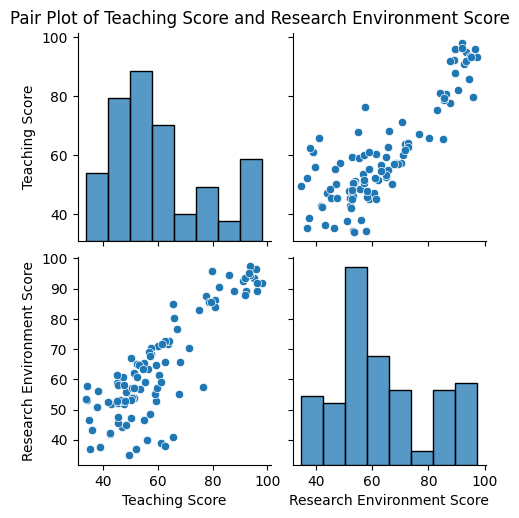

In [16]:
# Pair plot to analyze the distribution of 'Teaching Score' and 'Research Environment Score'
sns.pairplot(data[['Teaching Score', 'Research Environment Score']])
plt.suptitle('Pair Plot of Teaching Score and Research Environment Score', y=1.02)
plt.show()


**Investigate the correlation between 'International Outlook' and 'Research Quality Score' using a scatter plot with a regression line.**

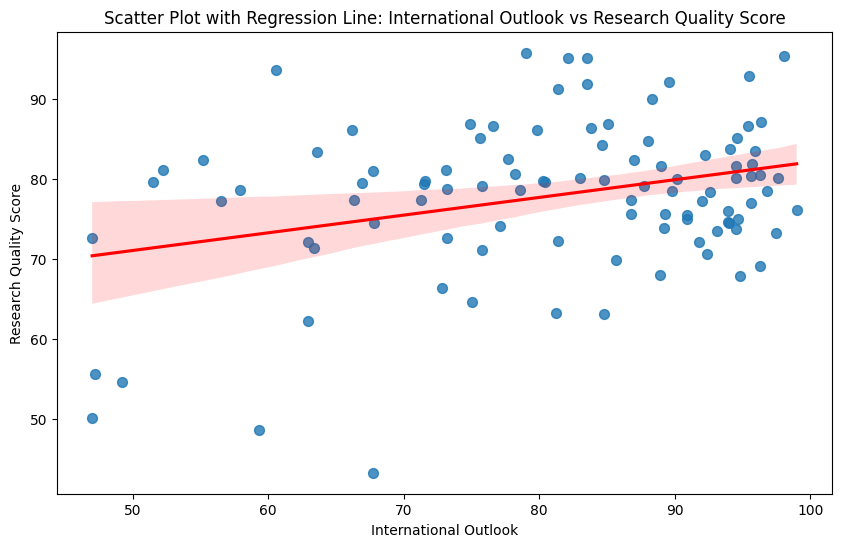

In [17]:
# Scatter plot with regression line to investigate correlation between 'International Outlook' and 'Research Quality Score'
plt.figure(figsize=(10, 6))
sns.regplot(x='International Outlook', y='Research Quality Score', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: International Outlook vs Research Quality Score')
plt.xlabel('International Outlook')
plt.ylabel('Research Quality Score')
plt.show()


**Visualize the top 15 universities with the highest 'Research Quality Score' using a horizontal bar chart.**

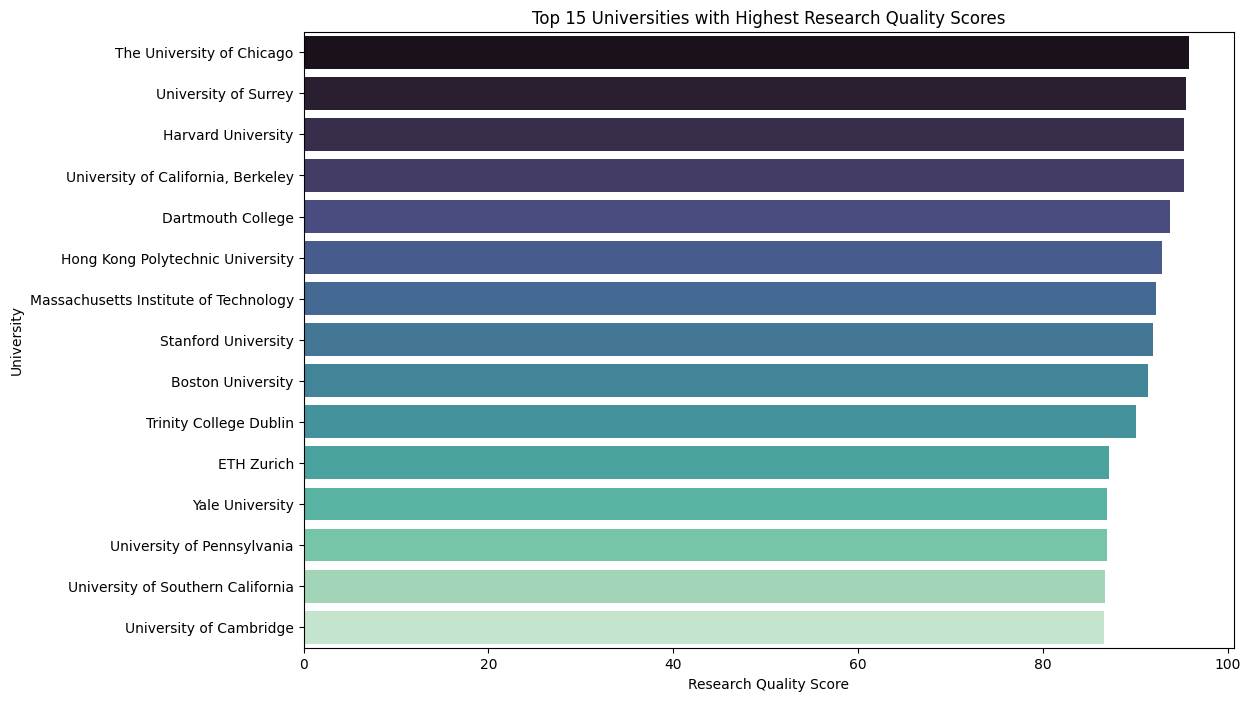

In [18]:
# Select the top 15 universities with the highest 'Research Quality Score'
top_15_research_quality = data.nlargest(15, 'Research Quality Score')

# Horizontal bar chart to visualize the 'Research Quality Score' for the top 15 universities
plt.figure(figsize=(12, 8))
sns.barplot(x='Research Quality Score', y='ranking-institution-title', data=top_15_research_quality, palette='mako')
plt.title('Top 15 Universities with Highest Research Quality Scores')
plt.xlabel('Research Quality Score')
plt.ylabel('University')
plt.show()


**Investigate the correlation between 'Research Quality Score' and 'Industry Score' using a scatter plot matrix in**

In [19]:
# Scatter plot matrix using Plotly Express to investigate correlation between 'Research Quality Score' and 'Industry Score'
scatter_matrix = px.scatter_matrix(data, dimensions=['Research Quality Score', 'Industry Score', 'Teaching Score', 'International Outlook'],
                                   color='Overall scores')
scatter_matrix.show()


**Analyze the distribution of 'Research Quality Score' and 'Teaching Score' using a hexbin plot in Matplotlib.**

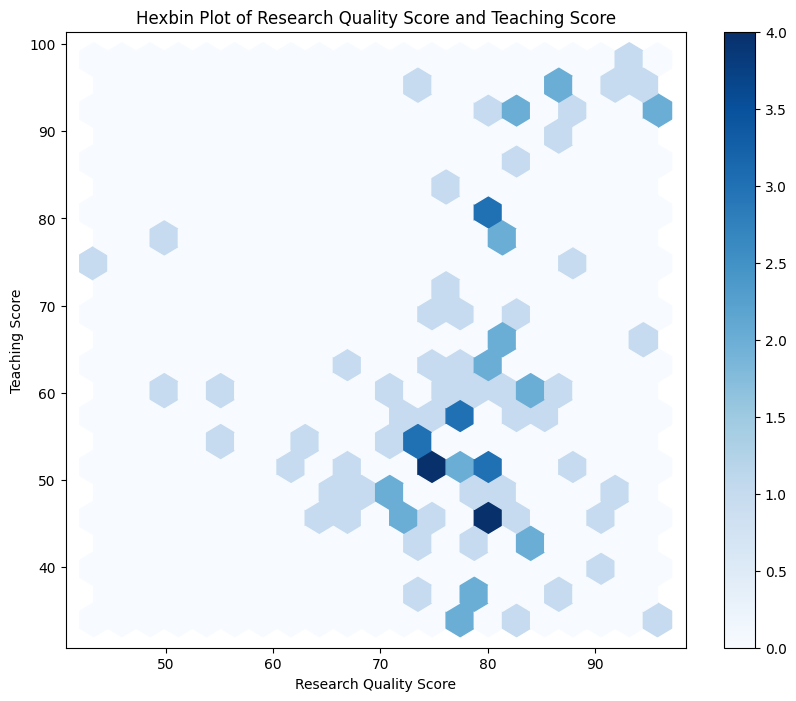

In [20]:
# Hexbin plot to analyze the distribution of 'Research Quality Score' and 'Teaching Score'
plt.figure(figsize=(10, 8))
plt.hexbin(data['Research Quality Score'], data['Teaching Score'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Research Quality Score and Teaching Score')
plt.xlabel('Research Quality Score')
plt.ylabel('Teaching Score')
plt.colorbar()
plt.show()


**Analyze the distribution of 'Research Quality Score' and 'Industry Score' using a scatter plot with marker size based on 'Teaching Score'**

In [21]:
# Scatter plot using Plotly Express to analyze 'Research Quality Score' and 'Industry Score' with marker size based on 'Teaching Score'
scatter_plot_marker_size = px.scatter(data, x='Research Quality Score', y='Industry Score', size='Teaching Score',
                                      color='Overall scores', hover_name='ranking-institution-title',
                                      title='Research Quality vs Industry Score with Teaching Score as Marker Size')
scatter_plot_marker_size.show()


**Visualize the distribution of 'Overall scores' using a cumulative distribution function (CDF) plot**

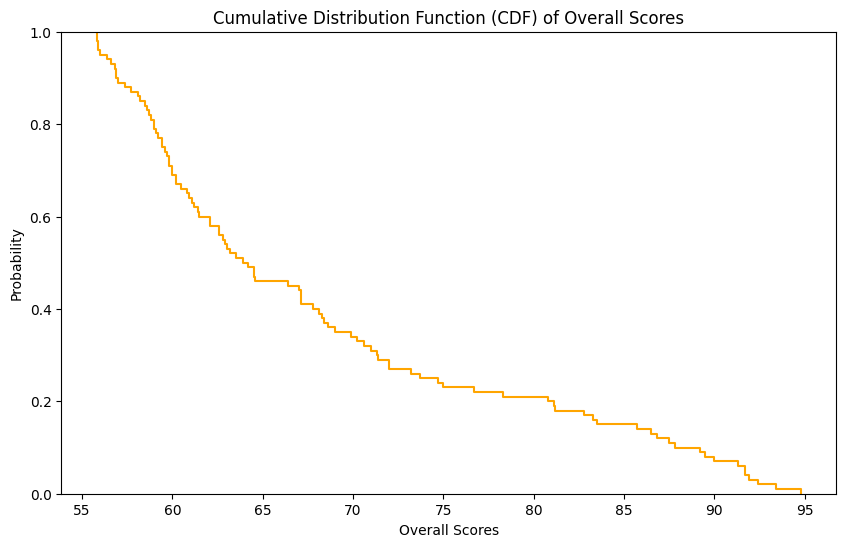

In [22]:
# CDF plot using Seaborn to visualize the distribution of 'Overall scores'
plt.figure(figsize=(10, 6))
sns.ecdfplot(data['Overall scores'], complementary=True, color='orange')
plt.title('Cumulative Distribution Function (CDF) of Overall Scores')
plt.xlabel('Overall Scores')
plt.ylabel('Probability')
plt.show()


**Explore the relationship between 'Research Environment Score' and 'International Outlook' using a 3D scatter plot**

In [23]:
# 3D Scatter plot using Plotly to explore the relationship between 'Research Environment Score' and 'International Outlook'
scatter_3d_plot = px.scatter_3d(data, x='Research Environment Score', y='International Outlook', z='Overall scores',
                                color='location', size='Teaching Score', hover_name='ranking-institution-title',
                                title='3D Scatter Plot: Research Environment, International Outlook, Overall Scores')
scatter_3d_plot.show()


**Analyze the distribution of 'Research Environment Score' across different ranks using a horizontal bar chart**

In [24]:
# Horizontal bar chart using Altair to analyze the distribution of 'Research Environment Score' across ranks
alt.Chart(data).mark_bar().encode(
    y='rank:O',
    x='mean(Research Environment Score):Q',
    color='rank:N'
).properties(
    title='Mean Research Environment Score Across Ranks'
).interactive()


alt.Chart(...)